## Trying to modify a PyTorch tutorial to suit our needs

In [1]:
%matplotlib inline

In [2]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.autograd import Variable

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Make a simple environment that satisfies openAI gym requirements
# Ref: https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e
# Ref: https://github.com/openai/gym/blob/master/docs/creating-environments.md
U_VELOCITY = 1
U_ACCELERATION = 2
O_VELOCITY = 1
O_ACCELERATION = 2

input_type = U_ACCELERATION
observe_type = O_VELOCITY
N = 10
env = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=observe_type).unwrapped


### Replay Memory and other packages



### Test out functions to auto-run the training and testing

In [4]:
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *

from importlib import reload
import utils
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)

<module 'utils.agents' from '/Users/zz/Documents/GT20F/7000/GNN_experiments/utils/agents.py'>

In [7]:
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *


In [5]:
na = env.na
ns = env.nf
hidden = 32

test_agents = [
    LearnerAgent(device, N, ns, na, hidden),
    RewardAgent(device, N, ns, na, hidden),
    RewardActionAgent(device, N, ns, na, hidden)
]

num_episode=5
test_interval=2
num_test=2
num_iteration=200
BATCH_SIZE=128
debug=True
num_sample=50

if input_type == U_ACCELERATION:
    action_space = [-env.a_max, env.a_max]
else:
    action_space = [-env.v_max, env.v_max]


In [114]:
# Test run
for agent in test_agents:
    train(agent, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Episode  0  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-251.11914981 -291.36713243 -220.24629986 -237.88564374 -243.02959101
 -372.25400294 -265.6448024  -391.98667503 -321.9655733  -307.10024736] ;
cumulative reward =  -271310.589116754
Finished episode  1  with  199  steps, and rewards =  [-350.86176789 -384.78971752 -298.12004072 -405.14136268 -374.80127399
 -479.67580277 -383.49706958 -427.52902349 -263.57492306 -269.16934183] ;
cumulative reward =  -341555.8227882968
Episode  1  finished; t =  199
Episode  2  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-441.87989561 -454.44968415 -635.27043628 -660.64520187 -433.35208989
 -635.10477321 -428.33539534 -388.6669188  -433.48192649 -529.32743464] ;
cumulative reward =  -453539.35288381006
Finished episode  1  with  199  steps, and rewards =  [-1486.52939612 -1099.55527799 -1486.45847416 -1008.37178213
 -1487.314863   -1017.43118255 -1221.08864964 -1052.20055909
 -1307.9215753

KeyboardInterrupt: 

In [ ]:
# Real run
num_episode=500
test_interval=50
num_test=50
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

In [6]:
agent1 = LearnerAgent(device, N, ns, na, hidden)
a1hist = train(agent1, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
Finished test  0  with  199 ; cumulative reward =  -8007.79038891511
Finished test  1  with  199 ; cumulative reward =  -15496.948326748916
Finished test  2  with  199 ; cumulative reward =  -2804.2637457842325
Finished test  3  with  199 ; cumulative reward =  -23463.52097704725
Finished test  4  with  199 ; cumulative reward =  -22357.10425997737
Finished test  5  with  199 ; cumulative reward =  -27474.3984104096
Finished test  6  with  199 ; cumulative reward =  -28915.39578320571
Finished test  7  with  199 ; cumulative reward =  -23408.192031743398
Finished test  8  with  199 ; cumulative reward =  -13960.511099970054
Finished test  9  with  199 ; cumulative reward =  -22045.76442711227
Finished test  10  with  199 ; cumulative reward =  -24499.120015060133
Finished test  11  with  199 ; cumulative reward =  -14415.629543063036
Finished test  12  with  199 ; cumulative reward =  -15344.671478572136
Finished test  13  with  199 ; cumulative reward =  -

In [8]:
env2 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=O_ACCELERATION).unwrapped
agent4 = LearnerAgent(device, N, env2.ns, env2.na, hidden)
a4hist = train(agent4, env2, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -19010.93707266477
Finished test  1  with  199 ; cumulative reward =  -9539.466706033798
Finished test  2  with  199 ; cumulative reward =  -4556.514588094061
Finished test  3  with  199 ; cumulative reward =  -15557.824012522242
Finished test  4  with  199 ; cumulative reward =  -9935.477908463534
Finished test  5  with  199 ; cumulative reward =  -5779.681594767772
Finished test  6  with  199 ; cumulative reward =  -9420.381066401904
Finished test  7  with  199 ; cumulative reward =  -10694.904515944276
Finished test  8  with  199 ; cumulative reward =  -9377.176539503433
Finished test  9  with  199 ; cumulative reward =  -10155.930093528379
Finished test  10  with  199 ; cumulative reward =  -4282.733515171402
Finished test

In [9]:
# Test if only controlling velocity would make matters worse
U_VELOCITY = 1
U_ACCELERATION = 2
O_VELOCITY = 1
O_ACCELERATION = 2

env3 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=U_VELOCITY, observe_type=O_VELOCITY).unwrapped
env4 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=U_VELOCITY, observe_type=O_ACCELERATION).unwrapped

agent5 = LearnerAgent(device, N, env3.no, env3.na, hidden)
a5hist = train(agent5, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)
agent6 = LearnerAgent(device, N, env4.no, env4.na, hidden)
a6hist = train(agent6, env4, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -290.5121728760935
Finished test  1  with  199 ; cumulative reward =  -352.32312522656065
Finished test  2  with  199 ; cumulative reward =  -288.38303944607884
Finished test  3  with  199 ; cumulative reward =  -359.5820640773027
Finished test  4  with  199 ; cumulative reward =  -354.8984055441301
Finished test  5  with  199 ; cumulative reward =  -278.25910349804053
Finished test  6  with  199 ; cumulative reward =  -305.5017117421733
Finished test  7  with  199 ; cumulative reward =  -287.6103003266309
Finished test  8  with  199 ; cumulative reward =  -219.7043273739452
Finished test  9  with  199 ; cumulative reward =  -328.90933192436313
Finished test  10  with  199 ; cumulative reward =  -403.54842030501163
Finished te

In [37]:
env3.ns

6

In [10]:
agent2 = RewardAgent(device, N, ns, na, hidden)
a2hist = train(agent2, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -19994.38364469432
Finished test  1  with  199 ; cumulative reward =  -20696.551004215307
Finished test  2  with  199 ; cumulative reward =  -25067.495394121222
Finished test  3  with  199 ; cumulative reward =  -17761.087998758325
Finished test  4  with  199 ; cumulative reward =  -14220.21213459748
Finished test  5  with  199 ; cumulative reward =  -26931.376246746266
Finished test  6  with  199 ; cumulative reward =  -28510.06738289403
Finished test  7  with  199 ; cumulative reward =  -22198.770006721352
Finished test  8  with  199 ; cumulative reward =  -11298.196774631942
Finished test  9  with  199 ; cumulative reward =  -27744.170922113815
Finished test  10  with  199 ; cumulative reward =  -16622.66506418574
Finished 

In [11]:
agent3 = RewardActionAgent(device, N, ns, na, hidden)
a3hist = train(agent3, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -20567.523365774356
Finished test  1  with  199 ; cumulative reward =  -20227.63741318575
Finished test  2  with  199 ; cumulative reward =  -20228.637078249623
Finished test  3  with  199 ; cumulative reward =  -20613.074725891132
Finished test  4  with  199 ; cumulative reward =  -20799.830938248662
Finished test  5  with  199 ; cumulative reward =  -20606.684409396188
Finished test  6  with  199 ; cumulative reward =  -19995.900545890385
Finished test  7  with  199 ; cumulative reward =  -20926.315172373965
Finished test  8  with  199 ; cumulative reward =  -20238.629504796816
Finished test  9  with  199 ; cumulative reward =  -20191.40868978866
Finished test  10  with  199 ; cumulative reward =  -20236.65673833526
Finished

In [29]:
a2hist += train(agent2, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -2081.167783072659
Finished test  1  with  199 ; cumulative reward =  -2660.0792905178146
Finished test  2  with  199 ; cumulative reward =  -1883.3324289804125
Finished test  3  with  199 ; cumulative reward =  -1938.0573983606214
Finished test  4  with  199 ; cumulative reward =  -1594.2714497295517
Finished test  5  with  199 ; cumulative reward =  -1376.9476739641002
Finished test  6  with  199 ; cumulative reward =  -9679.880642029204
Finished test  7  with  199 ; cumulative reward =  -1896.5560029468456
Finished test  8  with  199 ; cumulative reward =  -1323.810935137269
Finished test  9  with  199 ; cumulative reward =  -2587.730667789195
Finished test  10  with  199 ; cumulative reward =  -2657.0669678258087
Finished 

In [31]:
agent7 = RewardAgent(device, N, ns, na, hidden)
a7hist = train(agent7, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, 
               action_space=[-1,1], debug=debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867]
Finished test  0  with  199 ; cumulative reward =  -18803.096533695145
Finished test  1  with  199 ; cumulative reward =  -18915.921985677312
Finished test  2  with  199 ; cumulative reward =  -19077.6232748116
Finished test  3  with  199 ; cumulative reward =  -18699.15848204945
Finished test  4  with  199 ; cumulative reward =  -18994.10081991763
Finished test  5  with  199 ; cumulative reward =  -18911.004834122854
Finished test  6  with  199 ; cumulative reward =  -18848.198850287303
Finished test  7  with  199 ; cumulative reward =  -18882.70843394855
Finished test  8  with  199 ; cumulative reward =  -19239.509070071043
Finished test  9  with  199 ; cumulative reward =  -19354.47505594093
Finished test  10  with  199 ; cumulative reward =  -19067.844996333442
Finished te

In [38]:
agent1.save_model('test2_LA-uAcc-oVel')
agent2.save_model('test2_RA-uAcc-oVel')
agent3.save_model('test2_RAA')
agent4.save_model('test2_LA-uAcc-oAcc')
agent5.save_model('test2_LA-uVel-oVel')
agent6.save_model('test2_LA-uVel-oAcc')
agent7.save_model('test2_RA-uVel-oVel')

Saving model to models/LearnerAgent_test2_LA-uAcc-oVel
Saving model to models/RewardAgent_test2_RA-uAcc-oVel
Saving model to models/RewardActionAgent_test2_RAA
Saving model to models/LearnerAgent_test2_LA-uAcc-oAcc
Saving model to models/LearnerAgent_test2_LA-uVel-oVel
Saving model to models/LearnerAgent_test2_LA-uVel-oAcc
Saving model to models/RewardAgent_test2_RA-uVel-oVel


In [37]:
agent1.load_model('test2_LA-uAcc-oVel')
agent2.load_model('test2_RA-uAcc-oVel')
agent3.load_model('test2_RAA')
agent4.load_model('test2_LA-uAcc-oAcc')
agent5.load_model('test2_LA-uVel-oVel')
agent6.load_model('test2_LA-uVel-oAcc')
agent7.load_model('test2_RA-uVel-oVel')

Loading model from test2_LA-uAcc-oVel


NameError: name 'actor_path' is not defined

## Plot your result

In [12]:
# Run with baseline (e.g. expert)
def run_expert(env, num_iteration=200, seed=2020):
    reward_hist_hst = []
    N=env.N
    np.random.seed(seed)
    env_seeds = np.random.randint(0, 31102528, size=1)
    print(env_seeds)
    
    steps = 0
    cum_reward = 0
    reward_hist = []

    np.random.seed(env_seeds[0])
    state = env.reset()
    state = torch.from_numpy(state).float()
    env.render()

    for t in range(num_iteration):
        action = env.controller()
        next_state, reward, done, _ = env.step(action)
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        steps += 1
        if done:
            break
    print("Finished expert run with ", t, " steps, and cumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)
    return reward_hist_hst

In [17]:
# Randomly give a test
def plot_test(agent, env, fnames=[], num_iteration=100, action_space=[-1,1], imdir=''):
    reward_hist_hst = []
    N=env.N
    for e,f in enumerate(fnames):
        steps = 0
        agent.net.eval()
        cum_reward = 0
        reward_hist = []

        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)
        env.render()

        for t in range(num_iteration):  
            # Try to pick an action, react, and store the resulting behavior in the pool here
            actions = []
            for i in range(N):
                action = agent.select_action(state[i], **{
                    'steps_done':t, 'rand':False, 'num_sample':50, 'action_space':action_space
                })
                actions.append(action)
            action = np.array(actions).T 

            next_state, reward, done, _ = env.step(action)
            next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
            state = next_state
            cum_reward += sum(reward)
            reward_hist.append(reward)

            if len(f) > 0:
                img = env.render(mode="rgb_array")
                plt.imshow(img)
                plt.savefig(imdir + f + '-{:03d}.jpg'.format(t))
            steps += 1

            if done:
                print("Took ", t, " steps to converge")
                break
        print("Finished episode ", e, " with ", t, #" steps, and rewards = ", reward, 
              ";\ncumulative reward = ", cum_reward)
        reward_hist_hst.append(reward_hist)
    return reward_hist_hst

In [15]:
extest = run_expert(env)

[8168288]
Finished expert run with  18  steps, and cumulative reward =  -61.375266435410765


In [18]:
h1test = plot_test(agent1, env, fnames=['']*50,
#           fnames=['LearnerAgent_acc_test1', 'LearnerAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -5736.272449963471
Finished episode  1  with  199 ;
cumulative reward =  -27560.41832900007
Finished episode  2  with  199 ;
cumulative reward =  -22463.503628056544
Finished episode  3  with  199 ;
cumulative reward =  -11613.578086968502
Finished episode  4  with  199 ;
cumulative reward =  -18699.559665802873
Finished episode  5  with  199 ;
cumulative reward =  -5307.660990876745
Finished episode  6  with  199 ;
cumulative reward =  -21393.159361423674
Finished episode  7  with  199 ;
cumulative reward =  -33385.45446223229
Finished episode  8  with  199 ;
cumulative reward =  -21115.72402903467
Finished episode  9  with  199 ;
cumulative reward =  -3243.1423885137906
Finished episode  10  with  199 ;
cumulative reward =  -14133.28775270558
Finished episode  11  with  199 ;
cumulative reward =  -26410.708986525093
Finished episode  12  with  199 ;
cumulative reward =  -21943.235571126756
Finished episode  13  with  199 ;
cumulat

In [32]:
h2test = plot_test(agent2, env, fnames=['']*50, 
#           fnames=['RewardAgent_acc_test1', 'RewardAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -9428.886322370767
Finished episode  1  with  199 ;
cumulative reward =  -10159.795940552613
Finished episode  2  with  199 ;
cumulative reward =  -6555.69865519295
Finished episode  3  with  199 ;
cumulative reward =  -996.084059868648
Finished episode  4  with  199 ;
cumulative reward =  -1293.9337574970846
Finished episode  5  with  199 ;
cumulative reward =  -970.0954387447011
Finished episode  6  with  199 ;
cumulative reward =  -1448.0049220354936
Finished episode  7  with  199 ;
cumulative reward =  -11014.672469582454
Finished episode  8  with  199 ;
cumulative reward =  -11124.418657990072
Finished episode  9  with  199 ;
cumulative reward =  -5872.717597314429
Finished episode  10  with  199 ;
cumulative reward =  -1403.6216046828258
Finished episode  11  with  199 ;
cumulative reward =  -1187.4339541308368
Finished episode  12  with  199 ;
cumulative reward =  -8322.674502734973
Finished episode  13  with  199 ;
cumulativ

In [20]:
h3test = plot_test(agent3, env, fnames=['']*50, 
#           fnames=['RewardActionAgent_acc_test1'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -20439.450471906603
Finished episode  1  with  199 ;
cumulative reward =  -20167.036213467247
Finished episode  2  with  199 ;
cumulative reward =  -20769.34733782642
Finished episode  3  with  199 ;
cumulative reward =  -20496.4000542177
Finished episode  4  with  199 ;
cumulative reward =  -19910.02902894238
Finished episode  5  with  199 ;
cumulative reward =  -20091.983992739442
Finished episode  6  with  199 ;
cumulative reward =  -19824.5949394208
Finished episode  7  with  199 ;
cumulative reward =  -20513.798183001672
Finished episode  8  with  199 ;
cumulative reward =  -20236.564135197856
Finished episode  9  with  199 ;
cumulative reward =  -19902.876815536976
Finished episode  10  with  199 ;
cumulative reward =  -20084.794748590764
Finished episode  11  with  199 ;
cumulative reward =  -20232.72792236363
Finished episode  12  with  199 ;
cumulative reward =  -19915.785556096438
Finished episode  13  with  199 ;
cumulati

In [21]:
h4test = plot_test(agent4, env2, fnames=['']*50, 
#           fnames=['LearnerAgent_acc_oacc_test1', 'LearnerAgent_acc_oacc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -21677.139970202832
Finished episode  1  with  199 ;
cumulative reward =  -8100.1434606063085
Finished episode  2  with  199 ;
cumulative reward =  -18784.29398419146
Finished episode  3  with  199 ;
cumulative reward =  -23595.468916739526
Finished episode  4  with  199 ;
cumulative reward =  -9775.398764386231
Finished episode  5  with  199 ;
cumulative reward =  -17726.971046248484
Finished episode  6  with  199 ;
cumulative reward =  -26217.386672751552
Finished episode  7  with  199 ;
cumulative reward =  -25381.988706413955
Finished episode  8  with  199 ;
cumulative reward =  -27296.395803691175
Finished episode  9  with  199 ;
cumulative reward =  -7549.8357952205
Finished episode  10  with  199 ;
cumulative reward =  -16783.696162201588
Finished episode  11  with  199 ;
cumulative reward =  -4539.885941134307
Finished episode  12  with  199 ;
cumulative reward =  -23103.05189931198
Finished episode  13  with  199 ;
cumulati

In [22]:
h5test = plot_test(agent5, env3, fnames=['']*50, 
#           fnames=['LearnerAgent_uvel_ovel_test1', 'LearnerAgent_uvel_ovel_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Took  15  steps to converge
Finished episode  0  with  15 ;
cumulative reward =  -60.835551692023955
Took  15  steps to converge
Finished episode  1  with  15 ;
cumulative reward =  -64.97153020902846
Took  16  steps to converge
Finished episode  2  with  16 ;
cumulative reward =  -60.43184790434245
Took  17  steps to converge
Finished episode  3  with  17 ;
cumulative reward =  -59.73692121954981
Took  25  steps to converge
Finished episode  4  with  25 ;
cumulative reward =  -172.07288627409102
Took  16  steps to converge
Finished episode  5  with  16 ;
cumulative reward =  -87.07872486765591
Finished episode  6  with  199 ;
cumulative reward =  -2145.1389064281434
Took  15  steps to converge
Finished episode  7  with  15 ;
cumulative reward =  -75.78497449759108
Took  18  steps to converge
Finished episode  8  with  18 ;
cumulative reward =  -73.83054707501978
Took  18  steps to converge
Finished episode  9  with  18 ;
cumulative reward =  -98.07063297043199
Took  17  steps to conve

In [23]:
h6test = plot_test(agent6, env4, fnames=['']*50, 
#           fnames=['LearnerAgent_uvel_oacc_test1', 'LearnerAgent_uvel_oacc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Took  16  steps to converge
Finished episode  0  with  16 ;
cumulative reward =  -96.44147014457054
Finished episode  1  with  199 ;
cumulative reward =  -1834.9441676438464
Finished episode  2  with  199 ;
cumulative reward =  -1608.1480648149243
Took  16  steps to converge
Finished episode  3  with  16 ;
cumulative reward =  -58.708329525981206
Took  16  steps to converge
Finished episode  4  with  16 ;
cumulative reward =  -74.10591326127862
Took  19  steps to converge
Finished episode  5  with  19 ;
cumulative reward =  -69.87825252101426
Took  25  steps to converge
Finished episode  6  with  25 ;
cumulative reward =  -69.88420238406877
Took  19  steps to converge
Finished episode  7  with  19 ;
cumulative reward =  -98.26358157201835
Took  18  steps to converge
Finished episode  8  with  18 ;
cumulative reward =  -98.93076013928335
Took  18  steps to converge
Finished episode  9  with  18 ;
cumulative reward =  -124.1787870616705
Took  17  steps to converge
Finished episode  10  w

In [34]:
h7test = plot_test(agent7, env3, fnames=['']*50, 
#           fnames=['RewardAgent_uvel_ovel_test1', 'RewardAgent_uvel_ovel_test2'], 
          num_iteration=num_iteration, action_space=[-1,1], imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -569.0186481599659
Finished episode  1  with  199 ;
cumulative reward =  -15643.438307831659
Finished episode  2  with  199 ;
cumulative reward =  -845.1149073911336
Finished episode  3  with  199 ;
cumulative reward =  -679.3362863128934
Finished episode  4  with  199 ;
cumulative reward =  -629.6000158396422
Finished episode  5  with  199 ;
cumulative reward =  -782.2084900844427
Finished episode  6  with  199 ;
cumulative reward =  -565.3360495445605
Finished episode  7  with  199 ;
cumulative reward =  -805.5621668537822
Finished episode  8  with  199 ;
cumulative reward =  -722.1557570730517
Finished episode  9  with  199 ;
cumulative reward =  -878.1588414093796
Finished episode  10  with  199 ;
cumulative reward =  -778.5960353060403
Finished episode  11  with  199 ;
cumulative reward =  -14185.608039050714
Finished episode  12  with  199 ;
cumulative reward =  -738.082454385478
Finished episode  13  with  199 ;
cumulative re

In [24]:
# Plots out reward history data
def plot_reward_hist(reward_hists=[], ep_int=25, hist_names=[], log=True, num_iteration=0):
    # reward_hist : List of histories of reward histories
    # ep_int : number of episodes / size of intervals between two history lists
    # reward_hist = [ [ [ [agent 1's reward history for 1st run in ep=0],
    #                     [agent 1's reward history for 2nd run in ep=0],... ],
    #                   [ [agent 1's reward history for 1st run in ep=25],
    #                     [agent 1's reward history for 2nd run in ep=25],... ],... ],
    #                 [ same bunch of lists for agent 2 ], ...  ]
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,7))
    fig.suptitle('Top: Mean reward; Bottom: Iteration before done')

    if num_iteration > 0:
        max_num_iteration = num_iteration
    else:
        max_num_iteration = max([max(max_num_iteration, max([max([len(h) for h in hh]) for hh in hhh])) for hhh in reward_hists])
    
    for i,hhh in enumerate(reward_hists):
        num_ep = np.arange(len(hhh))*ep_int
        if log:
            re_avg = [ np.log(-1/np.mean([sum(h) for h in hh])) for hh in hhh ] # Mean of cumulative rewards for each ep
        else:
            re_avg = [ np.mean([sum(h) for h in hh]) for hh in hhh ] # Mean of cumulative rewards for each ep
        it_avg = [ np.mean([len(h) for h in hh]) for hh in hhh ] # Total number of iteartions for each ep
        max_iter_count = [ [len(h) for h in hh].count(max_num_iteration) for hh in hhh ]
        
        wid = 1 / len(hist_names) * 0.8 * ep_int
        offset = i * wid - 0.4 * ep_int
        ax1.bar(num_ep+offset, re_avg, label=hist_names[i], width=wid)
        ax2.bar(num_ep+offset, it_avg, label=hist_names[i], width=wid)
        ax3.bar(num_ep+offset, max_iter_count, label=hist_names[i], width=wid)
#     ax2.title.set_text('# of episodes trained')
    log_txt = ''
    if log:
        log_txt = 'Log '
    ax1.set_ylabel(log_txt+'Reward history (average)')
    ax2.set_ylabel('# of iterations (average)')
    ax3.set_ylabel('# of runs failed to converge')
#     ax1.set_xlabel('Reward')
    ax3.set_xlabel('# of episodes trained')
    ax2.legend()
    ax1.legend()
    ax3.legend()

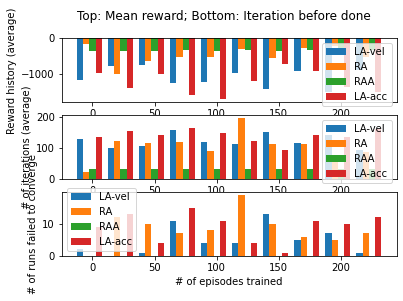

In [35]:
plot_reward_hist([a1hist, a2hist, a3hist, a4hist], 25, ['LA-vel','RA','RAA','LA-acc'], log=False, num_iteration=num_iteration)

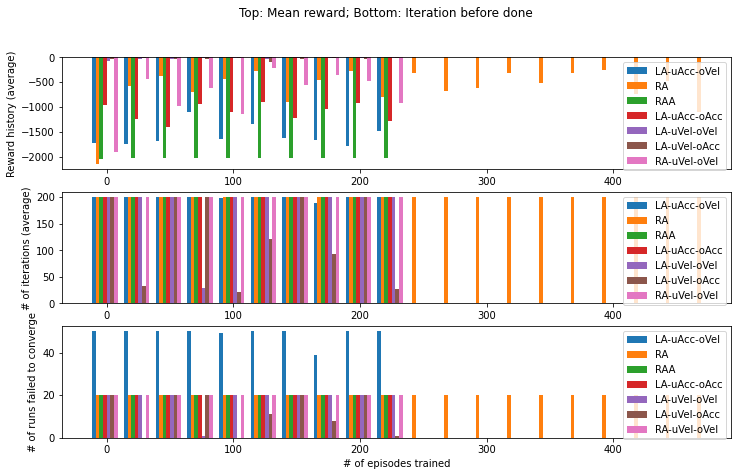

In [35]:
plot_reward_hist([a1hist, a2hist, a3hist, a4hist, a5hist, a6hist, a7hist], 25, 
                 ['LA-uAcc-oVel','RA','RAA','LA-uAcc-oAcc','LA-uVel-oVel','LA-uVel-oAcc','RA-uVel-oVel'], 
                 log=False, num_iteration=num_iteration)

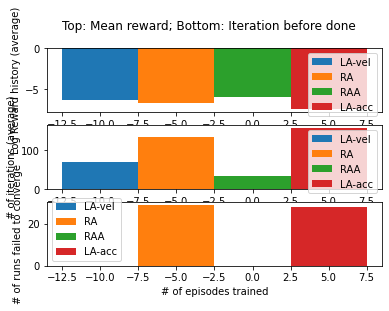

In [34]:
plot_reward_hist([[h1test], [h2test], [h3test], [h4test]], 25, ['LA-vel','RA','RAA','LA-acc'], num_iteration=num_iteration)

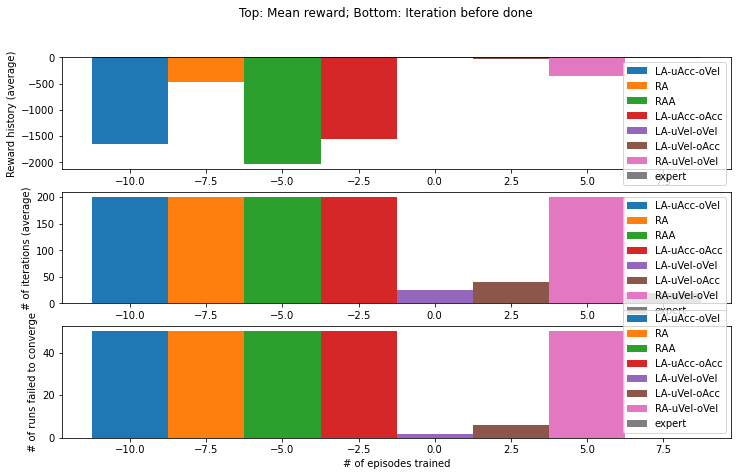

In [36]:
plot_reward_hist([[h1test], [h2test], [h3test], [h4test], [h5test], [h6test], [h7test], [extest]], 25, 
                 ['LA-uAcc-oVel','RA','RAA','LA-uAcc-oAcc','LA-uVel-oVel','LA-uVel-oAcc','RA-uVel-oVel','expert'], 
                 log=False, num_iteration=num_iteration)

In [21]:
def testfunc(a,b,**k):
    print(a,b)
    c = k.get('c',10)
    print(c)

testfunc(1,2,**{'c':9})

1 2
9


In [8]:
# Copy some of the methods from the original documentatoin here, because useful
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100
TARGET_UPDATE = 10
n_actions = 5

# policy_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net.load_state_dict(policy_net.state_dict())
# target_net.eval()

# Throws a coin to decide whether to randomly sample or to choose according to reward.
# Coin prob will change over time.
# This method should be called for each individual agent.
def select_action(state, steps_done, rand=True):
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    if sample > eps_threshold or (not rand):
        with torch.no_grad():
            # t.max(1) will return largest column value of each row (sample?).
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
#             print(policy_net(torch.tensor([state])))
#             print( policy_net(torch.tensor([state])).max(0))
#             print(policy_net(torch.tensor([state])).max(0)[1])
#             return policy_net(state).max(1)[1].view(1, 1)
            return policy_net(state.view(1,-1,N)).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)
#         return torch.tensor([[random.randrange(n_actions) for i in range(state.shape[0])]], device=device, dtype=torch.long)

# Steps over gradients from memory replay
def optimize_model(batch):
    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
#     action_batch = torch.cat(torch.from_numpy(np.asarray(batch.action)))
    action_batch = torch.from_numpy(np.asarray(batch.action))
#     reward_batch = torch.cat(torch.from_numpy(batch.reward))
    reward_batch = torch.from_numpy(np.asarray(batch.reward).astype('float32'))

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
#     print(policy_net(state_batch.view(BATCH_SIZE, -1, N)).shape)
#     print(action_batch.shape)
    state_action_values = policy_net(state_batch.view(BATCH_SIZE, -1, N)).gather(1, action_batch.view(-1,1)) # gather() Gathers values along axis=1, indexed by action_batch.
#     state_action_values = policy_net(state_batch).gather(1, action_batch) # gather() Gathers values along axis=1, indexed by action_batch.

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    
    policy_net.eval()
#     print(next_state_values[non_final_mask].shape)
#     print(policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).shape,
#           policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1))
    next_state_values[non_final_mask] = policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1)[0].detach()
#     next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    policy_net.train()

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))
#     print(state_action_values.dtype)
#     print(reward_batch.dtype)
#     print((next_state_values * GAMMA).dtype)
#     print(loss.dtype)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()


## Evaluation of "baseline" (randomly initialized) model without training

In [11]:
reward_hist_hst = []
for e in range(20):
    steps = 0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

Finished episode  0  with  999  steps, and rewards =  [-1.96185936e+00 -1.32202322e-01 -8.78520483e-04  4.35960755e-02
  5.64226895e-02] ;
cumulative reward =  -2274.8263208153744
Finished episode  1  with  999  steps, and rewards =  [-1.2544571  -1.42454866 -1.78495872 -3.05502998 -2.22425435] ;
cumulative reward =  -9744.17219086518
Finished episode  2  with  999  steps, and rewards =  [-2.13945091 -5.10391078 -3.23264593 -2.14586791 -2.06340293] ;
cumulative reward =  -14736.28822871912
Finished episode  3  with  999  steps, and rewards =  [0.345376   0.28955964 0.53227181 0.51226006 0.53927592] ;
cumulative reward =  2054.903559778193
Finished episode  4  with  999  steps, and rewards =  [ 0.18131797 -0.62875714  0.32106878  0.36668325  0.21029918] ;
cumulative reward =  213.51931934050307
Finished episode  5  with  999  steps, and rewards =  [-5.64247294 -5.55359473 -2.59796394 -2.46347959 -3.11616636] ;
cumulative reward =  -19387.253427994336
Finished episode  6  with  999  step

In [12]:
# Batch History
state_pool = []
action_pool = []
reward_pool = []
steps = 0

for e in range(num_episode):
    steps = 0
    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(num_iteration):
        policy_net.train()
        '''
        # actions = []
        # for i in range(N):
        #     # print(torch.Tensor(i), torch.Tensor([i]), torch.Tensor([[i]]))
        #     action = policy_net(state, Variable(torch.Tensor([i])))
        #     # print(i, action, action.data.numpy())
        #     action = action.data.numpy()
        #     actions.append(action)
        # # print("Final actions: ", actions)
        # action = np.array(actions).T
        # # print(action)
        '''            
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            # Should I normalize the values into probabilities and let the agent choose one here?
            action = select_action(state[i], t)
            actions.append(action)
        # print("Final actions: ", actions)
        action = np.array(actions) #.T
        
        next_state, reward, done, _ = env.step(action)
        env.render()
        
#         state = next_state
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
#         print(next_state)
#         state = Variable(state)

        for i in range(N):
            memory.push(state[i], action[i], next_state[i], reward[i])
#             state_pool.append(state[i])
#             action_pool.append(action[i])
#             reward_pool.append(reward[i])
        state = next_state
        steps += 1
        
        if len(memory) >= BATCH_SIZE:
            transitions = memory.sample(BATCH_SIZE)
            # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
            # detailed explanation). This converts batch-array of Transitions
            # to Transition of batch-arrays.
            batch = Transition(*zip(*transitions))
#             print(batch.next_state)
            optimize_model(batch)

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
#             plot_durations()
            break
    print("Episode ", e, " finished; t = ", t)
#     if not memory_available:
#         print("Samples taking too much memory. Quit? Remove half of them?")
#         memory.discard()
#         print("Oh snap")
    

Episode  0  finished; t =  999
Episode  1  finished; t =  999
Episode  2  finished; t =  999
Episode  3  finished; t =  999
Episode  4  finished; t =  999
Episode  5  finished; t =  999
Episode  6  finished; t =  999
Episode  7  finished; t =  999
Episode  8  finished; t =  999
Episode  9  finished; t =  999
Episode  10  finished; t =  999
Episode  11  finished; t =  999
Episode  12  finished; t =  999
Episode  13  finished; t =  999
Episode  14  finished; t =  999
Episode  15  finished; t =  999
Episode  16  finished; t =  999
Episode  17  finished; t =  999
Episode  18  finished; t =  999
Episode  19  finished; t =  999
Episode  20  finished; t =  999
Episode  21  finished; t =  999
Episode  22  finished; t =  999
Episode  23  finished; t =  999
Episode  24  finished; t =  999
Episode  25  finished; t =  999
Episode  26  finished; t =  999
Episode  27  finished; t =  999
Episode  28  finished; t =  999
Episode  29  finished; t =  999
Episode  30  finished; t =  999
Episode  31  finis

In [14]:
reward_hist_hst = []
for e in range(20):
    steps=0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

Finished episode  0  with  999  steps, and rewards =  [-7.23029778 -6.79407542 -5.17883092 -4.78657521 -4.19727563] ;
cumulative reward =  -28170.69441934428
Finished episode  1  with  999  steps, and rewards =  [ -3.19801046  -4.23965593  -4.5913873   -3.31960833 -10.36719812] ;
cumulative reward =  -25719.250145150294
Finished episode  2  with  999  steps, and rewards =  [-4.61045129 -6.75452837 -9.90853829 -4.88235819 -4.95635972] ;
cumulative reward =  -31082.229419159103
Finished episode  3  with  999  steps, and rewards =  [-4.53416681 -5.3311591  -7.23032993 -4.45295404 -5.71860783] ;
cumulative reward =  -27284.125255387917
Finished episode  4  with  999  steps, and rewards =  [-6.40542108 -6.17241013 -7.43870104 -4.79295261 -4.68106229] ;
cumulative reward =  -29404.848217499988
Finished episode  5  with  999  steps, and rewards =  [-6.84965117 -4.5171034  -5.18971541 -6.4939917  -5.15223549] ;
cumulative reward =  -28751.523193964207
Finished episode  6  with  999  steps, and

In [86]:
env.nf

4

In [122]:
a = np.arange(10).reshape((2,5))
np.clip(a,2,9)
# np.clip(a, np.array([[2,8]]).T, np.array([[4,9]]).T)

array([[2, 2, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
# state_batch = torch.cat(batch.state)
# bs = np.asarray(batch.state)
torch.cat([s for s in batch.state])

tensor([[-1.1780,  0.0162, -1.4030, -2.1048,  0.0000],
        [-0.8565, -1.3593, -1.3299, -1.3903,  0.0000],
        [-1.2942,  0.0000, -1.4692, -2.0210, -0.1162],
        ...,
        [ 0.0000, -0.1528, -0.1734, -0.1338,  1.0065],
        [ 0.0000,  1.2942, -0.1250, -0.7268,  1.2280],
        [ 0.0000, -0.3528, -0.2734, -0.1838,  0.9565]])

In [103]:
state_batch.view(BATCH_SIZE, -1, N).dtype

torch.float32

In [59]:
savs = policy_net(state_batch.view(BATCH_SIZE, -1, N))

In [11]:
img = env.render(mode="rgb_array")

In [13]:
img.shape

(800, 1200, 3)

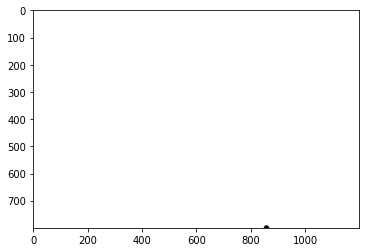

In [19]:
plt.imshow(img)
plt.savefig('test.jpg')

In [18]:
plt.savefig('test.jpg')

<Figure size 432x288 with 0 Axes>

In [113]:
np.asarray(reward).astype('float32').dtype

dtype('float32')

In [ ]:
def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.FloatTensor(episode_durations)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated